<a href="https://colab.research.google.com/github/KhushiBhadoria/Stock-Price-Prediction/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KERAS_BACKEND']='theano'
import keras
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from keras.models import sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model 
import random

In [ ]:
random.seed(200)
file=input("Enter the file name")
data=pd.read_csv(file.'csv',index_col=None,na_values=['NA'])

In [ ]:
data_to_use=int(input("enter the range"))
train_end=int(input("enter the range to end training"))

enter the range200
enter the range to end training40


In [ ]:
total_data=len(data)
print(total_data)

5306


In [ ]:
start=total_data-data_to_use
print(start)

5106


In [ ]:
i=[]
t=True
while t:
  col=int(input("enter the columns you want"))
  i.append(col)
  op=int(input("Do you want more columns 1.Yes 2.No"))
  if op==1:
    t=True
  else:
    t=False
l=[]
for x in range (len(i)):
  a= data.iloc[start:total_data ,i[x]]
  l.append(a)
print(l)
YY=int(input("enter the column you want to predict"))
yt1 = data.iloc [start:total_data ,YY]
yt1_=yt1.shift(-1)

enter the columns you want3
Do you want more columns 1.Yes 2.No1
enter the columns you want5
Do you want more columns 1.Yes 2.No1
enter the columns you want6
Do you want more columns 1.Yes 2.No1
enter the columns you want7
Do you want more columns 1.Yes 2.No1
enter the columns you want8
Do you want more columns 1.Yes 2.No1
enter the columns you want10
Do you want more columns 1.Yes 2.No2
[5106    227.60
5107    225.00
5108    262.75
5109    261.90
5110    261.35
         ...  
5301    475.70
5302    480.30
5303    485.05
5304    489.30
5305    489.85
Name: Prev Close, Length: 200, dtype: float64, 5106    231.70
5107    268.70
5108    268.45
5109    263.85
5110    273.55
         ...  
5301    483.85
5302    487.00
5303    493.20
5304    492.80
5305    511.80
Name: High, Length: 200, dtype: float64, 5106    224.10
5107    235.00
5108    255.05
5109    257.00
5110    259.00
         ...  
5301    477.00
5302    481.00
5303    481.25
5304    485.70
5305    489.30
Name: Low, Length: 200, d

In [ ]:
data=pd.DataFrame(l).T
print(data)
data_=pd.DataFrame({'Open':yt1,'yt1_':yt1_})
print(data_)
data_1= pd.concat([data, data_], axis=1)
data_1 = data_1.dropna()
print(data_1)

      Prev Close    High     Low    Last   Close       Volume
5106      227.60  231.70  224.10  225.30  225.00   13939467.0
5107      225.00  268.70  235.00  263.00  262.75  130367693.0
5108      262.75  268.45  255.05  261.25  261.90   52277954.0
5109      261.90  263.85  257.00  261.65  261.35   18856512.0
5110      261.35  273.55  259.00  272.95  270.80   21395182.0
...          ...     ...     ...     ...     ...          ...
5301      475.70  483.85  477.00  482.00  480.30    9314644.0
5302      480.30  487.00  481.00  483.85  485.05    7209467.0
5303      485.05  493.20  481.25  488.65  489.30    9615534.0
5304      489.30  492.80  485.70  489.00  489.85    7641133.0
5305      489.85  511.80  489.30  492.50  492.75   29115571.0

[200 rows x 6 columns]
        Open    yt1_
5106  228.40  236.00
5107  236.00  262.50
5108  262.50  258.60
5109  258.60  261.35
5110  261.35  278.50
...      ...     ...
5301  479.40  481.40
5302  481.40  485.85
5303  485.85  492.70
5304  492.70  491.50
5

In [ ]:
y=data_1['yt1_']
print(y)
x=data_1.iloc[ : ,:-1]
print(x)
cols=x.columns


5106    236.00
5107    262.50
5108    258.60
5109    261.35
5110    278.50
         ...  
5300    479.40
5301    481.40
5302    485.85
5303    492.70
5304    491.50
Name: yt1_, Length: 199, dtype: float64
      Prev Close    High     Low    Last   Close       Volume    Open
5106      227.60  231.70  224.10  225.30  225.00   13939467.0  228.40
5107      225.00  268.70  235.00  263.00  262.75  130367693.0  236.00
5108      262.75  268.45  255.05  261.25  261.90   52277954.0  262.50
5109      261.90  263.85  257.00  261.65  261.35   18856512.0  258.60
5110      261.35  273.55  259.00  272.95  270.80   21395182.0  261.35
...          ...     ...     ...     ...     ...          ...     ...
5300      486.65  487.35  474.35  475.40  475.70   13596003.0  483.55
5301      475.70  483.85  477.00  482.00  480.30    9314644.0  479.40
5302      480.30  487.00  481.00  483.85  485.05    7209467.0  481.40
5303      485.05  493.20  481.25  488.65  489.30    9615534.0  485.85
5304      489.30  492.80 

In [ ]:
scaler_x=preprocessing.MinMaxScaler(feature_range=(0,1))
x=np.array(x).reshape((len(x),len(cols)))
x=scaler_x.fit_transform(x)
scaler_y=preprocessing.MinMaxScaler(feature_range=(0,1))
y=np.array(y).reshape((len(y),1))
y=scaler_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
size=float(input("enter the size of testing"))
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=size,random_state=1)
dataset_sz = x.shape[0]
train_sz = x_train.shape[0]
test_sz = x_test.shape[0]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],-1))
y_train = np.reshape(y_train, (train_sz,-1))

enter the size of testing0.2


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
# dataset_sz = x.shape[0]
# train_sz = x_train.shape[0]
# test_sz = x_test.shape[0]
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],-1))
# y_train = np.reshape(y_train, (train_sz,-1))

In [ ]:
from keras.models import Sequential
act=input("ENter the activation function 1.tanh 2.relu 3.sigmoid 4.ELU ")
inact=input("Enter the inner activation function 1.hard_sigmoid 2.sigmoid ")
den=int(input("Enter the dense value"))
dro_=float(input("ENter the dropout value"))
model=Sequential()
model.add(LSTM(100, activation=act, recurrent_activation=inact,input_shape=(len(cols),1)))
model.add(Dense(den))
model.add(Dropout(dro_))
model.add(Dense(den))
model.add(Dropout(dro_))
model.add(Dense(1,activation='linear'))

ENter the activation function 1.tanh 2.relu 3.sigmoid 4.ELU tanh
Enter the inner activation function 1.hard_sigmoid 2.sigmoid hard_sigmoid
Enter the dense value50
ENter the dropout value0.3


In [ ]:
# from keras.models import Sequential
# model=Sequential()
# model.add(LSTM(100, activation='tanh', recurrent_activation='hard_sigmoid',input_shape=(len(cols),1)))
# model.add(Dense(50 ))
# model.add(Dropout(0.3))
# model.add(Dense(50))
# model.add(Dropout(0.3))
# model.add(Dense(1,activation='linear'))

In [ ]:
opt=input("ENter the name of optimizer 1.RMSprop 2.SGD 3.Adam 4.Adadelta 5.Adagrad 6.FTRL")
model.compile(optimizer=opt,loss='mean_squared_error')
bat=int(input("enter the batch size"))
epo=int(input("enter the epochs"))
history=model.fit(x_train,y_train,batch_size=bat,epochs=epo,shuffle=False)
print(history)

ENter the name of optimizer 1.RMSprop 2.SGD 3.Adam 4.Adadelta 5.Adagrad 6.FTRLRMSprop
enter the batch size25
enter the epochs7
Epoch 1/7
7/7 [==============================] - 3s 13ms/step - loss: 0.0887
Epoch 2/7
7/7 [==============================] - 0s 11ms/step - loss: 0.0271
Epoch 3/7
7/7 [==============================] - 0s 11ms/step - loss: 0.0148
Epoch 4/7
7/7 [==============================] - 0s 15ms/step - loss: 0.0156
Epoch 5/7
7/7 [==============================] - 0s 14ms/step - loss: 0.0155
Epoch 6/7
7/7 [==============================] - 0s 13ms/step - loss: 0.0171
Epoch 7/7
7/7 [==============================] - 0s 14ms/step - loss: 0.0145


In [ ]:
# model.compile(optimizer='RMSprop',loss='mean_squared_error')
# history=model.fit(x_train,y_train,batch_size=25,epochs=5,shuffle=False)
# print(history)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],-1))
score_train=model.evaluate(x_train,y_train,batch_size=1)
score_test=model.evaluate(x_test,y_test,batch_size=1)
print("in train MSE=",round(score_train,4))
print("in test MSE=",score_test)

40/40 [==============================] - 0s 2ms/step - loss: 0.0053
in train MSE= 0.0063
in test MSE= 0.005277569405734539


In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],-1))
pred1= model.predict(x_test)
pred1= scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1),1)))
pred=pd.DataFrame(pred1)
print(pred1)
prediction_data=pred1[-1]
print("prediction data:")
print(prediction_data)
print("actual data")
x_test=scaler_x.inverse_transform(np.array(x_test).reshape((len(x_test),len(cols))))
print(x_test)

[[0.6060151 ]
 [0.18259564]
 [0.15063919]
 [0.37077585]
 [0.66070026]
 [0.63667136]
 [0.39062822]
 [0.13384122]
 [0.13381603]
 [0.64444584]
 [0.2708041 ]
 [0.15368983]
 [0.14757024]
 [0.6405629 ]
 [0.6837689 ]
 [0.50068426]
 [0.40013403]
 [0.1392147 ]
 [0.40020502]
 [0.34247538]
 [0.2867219 ]
 [0.15660097]
 [0.26216298]
 [0.39072308]
 [0.13224895]
 [0.6612396 ]
 [0.15456893]
 [0.14304651]
 [0.6340009 ]
 [0.1489776 ]
 [0.27966833]
 [0.6929695 ]
 [0.34571353]
 [0.65202767]
 [0.67611796]
 [0.5730901 ]
 [0.68466705]
 [0.5820848 ]
 [0.33676642]
 [0.4940567 ]]
prediction data:
[0.4940567]
actual data
[[0.71679909 0.72945205 0.72094801 0.72032613 0.71927506 0.08352169
  0.71623156]
 [0.20336739 0.21023592 0.20795107 0.21596511 0.21729281 0.16622343
  0.20355656]
 [0.1780174  0.1914003  0.16781346 0.16514979 0.17481593 0.15292814
  0.17253121]
 [0.46802876 0.45909437 0.44992355 0.45582101 0.45421937 0.05137051
  0.45913734]
 [0.75879682 0.78386606 0.77293578 0.80015169 0.79403436 0.09078258
  

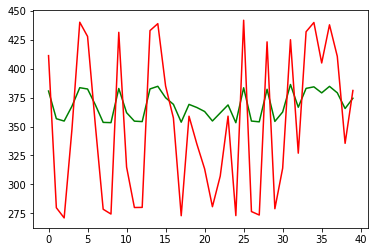

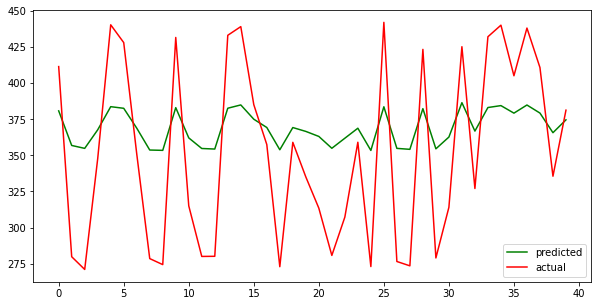

[3.850000e+02 3.866000e+02 3.828000e+02 3.846000e+02 3.844000e+02
 7.188435e+06 3.850000e+02]
[374.4997]


In [ ]:
plt.plot(pred1,label="predictions",c='g')
y_test=scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test),1)))
plt.plot([row[0]for row in y_test],label='actual',c='r')
plt.figure(figsize=(10,5))
plt.plot(pred1,label="predicted",c="g")
plt.plot([row[0]for row in y_test],label="actual",c='r')
plt.legend()
plt.show()
print(x_test[-1])
print(pred1[-1])